L'aide de Beautiful soup est ici : <https://www.crummy.com/software/BeautifulSoup/bs4/doc/>

In [1]:
from bs4 import BeautifulSoup

In [220]:
soup = BeautifulSoup(open('data_1926-1928.html', encoding='iso-8859-1'), 'html.parser')

In [221]:
spacers = soup.find_all(class_='spacer')

In [222]:
node = spacers[4]

In [223]:
node

<div class="spacer"><p style="text-align: left; font-weight: bold;">Statistiques :  </p></div>

In [224]:
len(node)

1

In [225]:
node.contents

[<p style="text-align: left; font-weight: bold;">Statistiques :  </p>]

In [226]:
node.p.text

'Statistiques :\xa0 '

Vérifions pour tous les spacers :

In [227]:
len([node.p.text for node in spacers if node.p is not None])

36

In [228]:
3 * 12

36

C'est suffisament régulier sur nos données de test. On a 12 valeurs par an * 3 ans.

In [229]:
node.next_sibling.table.tr.text

'Ecoulement mensuel'

In [230]:
[node.next_sibling.table.find(text='Maximum instantané').parent.parent.parent
 for node in spacers if node.p is not None]

[<tr><td class="left" colspan="3" id="C1"><span class="procedure_choix">Maximum instantané</span></td></tr>,
 <tr><td class="left" colspan="3" id="C1"><span class="procedure_choix">Maximum instantané</span></td></tr>,
 <tr><td class="left" colspan="3" id="C1"><span class="procedure_choix">Maximum instantané</span></td></tr>,
 <tr><td class="left" colspan="3" id="C1"><span class="procedure_choix">Maximum instantané</span></td></tr>,
 <tr><td class="left" colspan="3" id="C1"><span class="procedure_choix">Maximum instantané</span></td></tr>,
 <tr><td class="left" colspan="3" id="C1"><span class="procedure_choix">Maximum instantané</span></td></tr>,
 <tr><td class="left" colspan="3" id="C1"><span class="procedure_choix">Maximum instantané</span></td></tr>,
 <tr><td class="left" colspan="3" id="C1"><span class="procedure_choix">Maximum instantané</span></td></tr>,
 <tr><td class="left" colspan="3" id="C1"><span class="procedure_choix">Maximum instantané</span></td></tr>,
 <tr><td class="lef

In [231]:
node

<div class="spacer"><p style="text-align: left; font-weight: bold;">Statistiques :  </p></div>

# Utilisation d'une regexp 

In [232]:
node.next_sibling.table.text

"\nEcoulement mensuel\n\n\xa0\nValidité :\n#\n\n\n\xa0\nDébit moyen :\n663.0\xa0m3/s\n\n\n\xa0\nDébit moyen spécifique :\n15.10\xa0l/s/km2\n\n\n\xa0\nLame d'eau :\n40.5\xa0mm\n\n\xa0\nEcoulement naturel reconstitué\n\n\xa0\nValidité :\n#\n\n\n\xa0\nDébit moyen :\n663.0\xa0m3/s\n\n\n\xa0\nDébit moyen spécifique :\n15.10\xa0l/s/km2\n\n\n\xa0\nLame d'eau :\n40.5\xa0mm\n\n\xa0\nMaximum instantané\n\n\xa0\nDébit :\n863.0\xa0m3/s\n\n\n\xa0\nDate :\n10/03/1926 07:00\n\n\n\xa0\nHauteur :\n280.0\xa0cm\n\n\n\xa0\nDate :\n10/03/1926 07:00\n\n"

In [233]:
t = node.next_sibling.table.text

In [69]:
import re

In [250]:
pattern_cm = re.compile('Hauteur :\n(\d+.\d*)\xa0cm.+Date :\n([\d/: ]+)', re.DOTALL)

In [284]:
pattern_mm = re.compile('Hauteur :\n(\d+.\d*)\xa0mm.+Date :\n([\d/: ]+)', re.DOTALL)

In [252]:
re.findall(pattern_cm, t)

[('280.0', '10/03/1926 07:00')]

In [112]:
[re.findall(p, t) for t in [node.next_sibling.table.text for node in spacers] if t is not None]

AttributeError: 'NavigableString' object has no attribute 'table'

In [133]:
for node in spacers:
    print(node)
    if len(list(node.children)) > 0:
        if node.next_sibling.table is not None:
            t = node.next_sibling.table.text
            print(re.findall(p, t))

<div class="spacer"></div>
<div class="spacer"> </div>


AttributeError: 'NavigableString' object has no attribute 'table'

In [132]:
list(node.children)

['\xa0']

In [125]:
len(node.children)

TypeError: object of type 'list_iterator' has no len()

# On cherche les tables 

In [160]:
table = soup.find_all('table', class_='statistiques')[1]

## Filtrage mensuel 

On prend la table si elle est liée au mois (donc débits journaliers) :

In [174]:
def is_monthly(table):
    "Returns True if monthly data table."
    cap = table.find('caption')
    if cap is None:
        label = table.find(class_='procedure_choix')
        if label is not None:
            return label.text == 'Ecoulement mensuel'
        else:
            return False
    else:
        return False

In [175]:
table = soup.find_all('table', class_='statistiques')[1]
table

<table class="statistiques" width="42%"><tbody>
<tr><td class="left" colspan="3" id="C1"><span class="procedure_choix">Ecoulement annuel</span></td></tr>
<tr>
<td class="left" id="C1"> </td>
<td class="left" id="C2" style="text-align:left;border-color:#FFFFFF;font-size:1em;" width="40%">Débit moyen :</td>
<td class="left" id="C3" style="text-align:left;border-color:#FFFFFF;font-size:1em;" width="50%">441.0 m3/s</td>
</tr>
<tr>
<td class="left" id="C1"> </td>
<td class="left" id="C2" style="text-align:left;border-color:#FFFFFF;font-size:1em;" width="40%">Débit moyen spécifique :</td>
<td class="left" id="C3" style="text-align:left;border-color:#FFFFFF;font-size:1em;" width="50%">10.10 l/s/km2</td>
</tr>
<tr>
<td class="left" id="C1"> </td>
<td class="left" id="C2" style="text-align:left;border-color:#FFFFFF;font-size:1em;" width="40%">Lame d'eau :</td>
<td class="left" id="C3" style="text-align:left;border-color:#FFFFFF;font-size:1em;" width="50%">318.0 mm</td>
</tr>
<tr><td class="left

In [176]:
table.find(class_='procedure_choix').text

'Ecoulement annuel'

In [177]:
is_monthly(table)

False

In [178]:
for table in soup.find_all('table', class_='statistiques'):
    print(is_monthly(table))

False
False
True
True
True
True
True
True
True
True
True
True
True
True
False
False
True
True
True
True
True
True
True
True
True
True
True
True
False
False
True
True
True
True
True
True
True
True
True
True
True
True


## Extraction donnée 

On sait qu'on a une table mensuelle, mais on n'est pas sûr des données qu'elle contient.

In [297]:
def extract_height_date(soup):
    "Extracts height (in cm) and date from soup."
    pattern_cm = re.compile('Hauteur :\n(\d+.\d*)\xa0cm.+Date :\n([\d/: ]+)', re.DOTALL)
    pattern_mm = re.compile('Hauteur :\n(\d+.\d*).*mm.+Date :\n([\d/: ]+)', re.DOTALL)
    res = re.findall(pattern_cm, soup.text)
    if len(res) > 0:
        # assume it was cm
        return res
    else:
        # assume it was mm
        res = re.findall(pattern_mm, soup.text)
        return res

In [276]:
data = []
for table in soup.find_all('table', class_='statistiques'):
    if is_monthly(table):
        data.append(*re.findall(p, table.text))

In [277]:
import pandas as pd

In [246]:
def parse_dates(df):
    df = df.copy()
    df['date'] = pd.to_datetime(df['date'])
    return df

In [247]:
def make_numeric(df):
    df = df.copy()
    df['hauteur'] = [float(val.replace(',', '.')) for val in df['hauteur']]
    return df

In [248]:
df = pd.DataFrame(data, columns=['hauteur', 'date']).pipe(parse_dates).pipe(make_numeric).set_index('date')

In [249]:
df

,hauteur
date,
1926-08-01 07:00:00,602.0
1926-07-02 07:00:00,365.0
1926-10-03 07:00:00,280.0
1926-04-28 07:00:00,171.0
1926-05-22 07:00:00,350.0
1926-06-18 07:00:00,320.0
1926-01-07 00:01:00,176.0
1926-02-08 07:00:00,112.0
1926-09-25 07:00:00,96.0


In [209]:
%matplotlib notebook

In [210]:
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


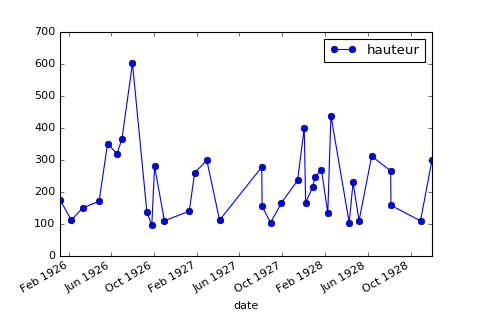

In [212]:
fig, ax = plt.subplots()
df.plot.line(ax=ax, style='-o')

# Tests 

## Fonction

In [356]:
def extract_height_date(soup):
    "Extracts height (in cm) and date from soup."
    pattern_cm = re.compile('Hauteur :\n(\d+.\d*)[ \xa0]cm.+Date :\n([\d/: ]+)', re.DOTALL)
    pattern_mm = re.compile('Hauteur :\n(\d+.\d*)[ \xa0]mm.+Date :\n([\d/: ]+)', re.DOTALL)
    res = re.findall(pattern_cm, soup.text)
    if len(res) > 0:
        # assume it was cm
        return res
    else:
        # assume it was mm
        res = re.findall(pattern_mm, soup.text)
        if len(res) > 0:
            height, date = res[0]
            height = str(float(height) / 10)
            return [(height, date)]
        else:
            return [(None, None)]

## Test cases 

On va tester les extractions en cm et mm et valider les résultats.

In [357]:
test_cases = ["""<table class="statistiques" width="42%"><tbody>
<tr><td class="left" colspan="3" id="C1"><span class="procedure_choix">Ecoulement mensuel</span></td></tr>
<tr>
<td class="left" id="C1"> </td>
<td class="left" id="C2" style="text-align:left;border-color:#FFFFFF;font-size:1em;" width="40%">Débit moyen :</td>
<td class="left" id="C3" style="text-align:left;border-color:#FFFFFF;font-size:1em;" width="50%">366.0 m3/s</td>
</tr>
<tr>
<td class="left" id="C1"> </td>
<td class="left" id="C2" style="text-align:left;border-color:#FFFFFF;font-size:1em;" width="40%">Débit moyen spécifique :</td>
<td class="left" id="C3" style="text-align:left;border-color:#FFFFFF;font-size:1em;" width="50%">8.37 l/s/km2</td>
</tr>
<tr>
<td class="left" id="C1"> </td>
<td class="left" id="C2" style="text-align:left;border-color:#FFFFFF;font-size:1em;" width="40%">Lame d'eau :</td>
<td class="left" id="C3" style="text-align:left;border-color:#FFFFFF;font-size:1em;" width="50%">22.4 mm</td>
</tr>
<tr><td class="left" colspan="3" id="C1"> </td></tr>
<tr><td class="left" colspan="3" id="C1"><span class="procedure_choix">Ecoulement naturel reconstitué</span></td></tr>
<tr>
<td class="left" id="C1"> </td>
<td class="left" id="C2" style="text-align:left;border-color:#FFFFFF;font-size:1em;" width="30%">Débit moyen :</td>
<td class="left" id="C3" style="text-align:left;border-color:#FFFFFF;font-size:1em;" width="50%">366.0 m3/s</td>
</tr>
<tr>
<td class="left" id="C1"> </td>
<td class="left" id="C2" style="text-align:left;border-color:#FFFFFF;font-size:1em;" width="30%">Débit moyen spécifique :</td>
<td class="left" id="C3" style="text-align:left;border-color:#FFFFFF;font-size:1em;" width="50%">8.37 l/s/km2</td>
</tr>
<tr>
<td class="left" id="C1"> </td>
<td class="left" id="C2" style="text-align:left;border-color:#FFFFFF;font-size:1em;" width="30%">Lame d'eau :</td>
<td class="left" id="C3" style="text-align:left;border-color:#FFFFFF;font-size:1em;" width="50%">22.4 mm</td>
</tr>
<tr><td class="left" colspan="3" id="C1"> </td></tr>
<tr><td class="left" colspan="3" id="C1"><span class="procedure_choix">Maximum instantané</span></td></tr>
<tr>
<td class="left" id="C1"> </td>
<td class="left" id="C2" style="text-align:left;border-color:#FFFFFF;font-size:1em;" width="30%">Hauteur :</td>
<td class="left" id="C3" style="text-align:left;border-color:#FFFFFF;font-size:1em;" width="50%">1570.0 mm</td>
</tr>
<tr>
<td class="left" id="C1"> </td>
<td class="left" id="C2" style="text-align:left;border-color:#FFFFFF;font-size:1em;" width="30%">Date :</td>
<td class="left" id="C3" style="text-align:left;border-color:#FFFFFF;font-size:1em;" width="50%">17/01/2008 19:10</td>
</tr>
</tbody></table>""",
             """<table class="statistiques" width="42%"><tbody>
<tr><td class="left" colspan="3" id="C1"><span class="procedure_choix">Ecoulement annuel</span></td></tr>
<tr>
<td class="left" id="C1"> </td>
<td class="left" id="C2" style="text-align:left;border-color:#FFFFFF;font-size:1em;" width="40%">Débit moyen :</td>
<td class="left" id="C3" style="text-align:left;border-color:#FFFFFF;font-size:1em;" width="50%">441.0 m3/s</td>
</tr>
<tr>
<td class="left" id="C1"> </td>
<td class="left" id="C2" style="text-align:left;border-color:#FFFFFF;font-size:1em;" width="40%">Débit moyen spécifique :</td>
<td class="left" id="C3" style="text-align:left;border-color:#FFFFFF;font-size:1em;" width="50%">10.10 l/s/km2</td>
</tr>
<tr>
<td class="left" id="C1"> </td>
<td class="left" id="C2" style="text-align:left;border-color:#FFFFFF;font-size:1em;" width="40%">Lame d'eau :</td>
<td class="left" id="C3" style="text-align:left;border-color:#FFFFFF;font-size:1em;" width="50%">318.0 mm</td>
</tr>
<tr><td class="left" colspan="3" id="C1"> </td></tr>
<tr><td class="left" colspan="3" id="C1"><span class="procedure_choix">Ecoulement naturel reconstitué</span></td></tr>
<tr>
<td class="left" id="C1"> </td>
<td class="left" id="C2" style="text-align:left;border-color:#FFFFFF;font-size:1em;" width="30%">Débit moyen :</td>
<td class="left" id="C3" style="text-align:left;border-color:#FFFFFF;font-size:1em;" width="50%">441.0 m3/s</td>
</tr>
<tr>
<td class="left" id="C1"> </td>
<td class="left" id="C2" style="text-align:left;border-color:#FFFFFF;font-size:1em;" width="30%">Débit moyen spécifique :</td>
<td class="left" id="C3" style="text-align:left;border-color:#FFFFFF;font-size:1em;" width="50%">10.10 l/s/km2</td>
</tr>
<tr>
<td class="left" id="C1"> </td>
<td class="left" id="C2" style="text-align:left;border-color:#FFFFFF;font-size:1em;" width="30%">Lame d'eau :</td>
<td class="left" id="C3" style="text-align:left;border-color:#FFFFFF;font-size:1em;" width="50%">318.0 mm</td>
</tr>
<tr><td class="left" colspan="3" id="C1"> </td></tr>
<tr><td class="left" colspan="3" id="C1"><span class="procedure_choix">Maximum instantané</span></td></tr>
<tr>
<td class="left" id="C1"> </td>
<td class="left" id="C2" style="text-align:left;border-color:#FFFFFF;font-size:1em;" width="30%">Débit :</td>
<td class="left" id="C3" style="text-align:left;border-color:#FFFFFF;font-size:1em;" width="50%">1740.0 m3/s</td>
</tr>
<tr>
<td class="left" id="C1"> </td>
<td class="left" id="C2" style="text-align:left;border-color:#FFFFFF;font-size:1em;" width="30%">Validité :</td>
<td class="left" id="C3" style="text-align:left;border-color:#FFFFFF;font-size:1em;" width="50%">#</td>
</tr>
<tr>
<td class="left" id="C1"> </td>
<td class="left" id="C2" style="text-align:left;border-color:#FFFFFF;font-size:1em;" width="30%">Date :</td>
<td class="left" id="C3" style="text-align:left;border-color:#FFFFFF;font-size:1em;" width="50%">08/01/1926 07:00</td>
</tr>
<tr>
<td class="left" id="C1"> </td>
<td class="left" id="C2" style="text-align:left;border-color:#FFFFFF;font-size:1em;" width="30%">Hauteur :</td>
<td class="left" id="C3" style="text-align:left;border-color:#FFFFFF;font-size:1em;" width="50%">602.0 cm</td>
</tr>
<tr>
<td class="left" id="C1"> </td>
<td class="left" id="C2" style="text-align:left;border-color:#FFFFFF;font-size:1em;" width="30%">Date :</td>
<td class="left" id="C3" style="text-align:left;border-color:#FFFFFF;font-size:1em;" width="50%">08/01/1926 07:00</td>
</tr>
</tbody></table>""", 
             """<table class="statistiques" width="42%"><tbody>
<tr><td class="left" colspan="3" id="C1"><span class="procedure_choix">Ecoulement mensuel</span></td></tr>
<tr>
<td class="left" id="C1"> </td>
<td class="left" id="C2" style="text-align:left;border-color:#FFFFFF;font-size:1em;" width="40%">Débit moyen :</td>
<td class="left" id="C3" style="text-align:left;border-color:#FFFFFF;font-size:1em;" width="50%">518.0 m3/s</td>
</tr>
<tr>
<td class="left" id="C1"> </td>
<td class="left" id="C2" style="text-align:left;border-color:#FFFFFF;font-size:1em;" width="40%">Débit moyen spécifique :</td>
<td class="left" id="C3" style="text-align:left;border-color:#FFFFFF;font-size:1em;" width="50%">11.80 l/s/km2</td>
</tr>
<tr>
<td class="left" id="C1"> </td>
<td class="left" id="C2" style="text-align:left;border-color:#FFFFFF;font-size:1em;" width="40%">Lame d'eau :</td>
<td class="left" id="C3" style="text-align:left;border-color:#FFFFFF;font-size:1em;" width="50%">28.6 mm</td>
</tr>
<tr><td class="left" colspan="3" id="C1"> </td></tr>
<tr><td class="left" colspan="3" id="C1"><span class="procedure_choix">Ecoulement naturel reconstitué</span></td></tr>
<tr>
<td class="left" id="C1"> </td>
<td class="left" id="C2" style="text-align:left;border-color:#FFFFFF;font-size:1em;" width="30%">Débit moyen :</td>
<td class="left" id="C3" style="text-align:left;border-color:#FFFFFF;font-size:1em;" width="50%">518.0 m3/s</td>
</tr>
<tr>
<td class="left" id="C1"> </td>
<td class="left" id="C2" style="text-align:left;border-color:#FFFFFF;font-size:1em;" width="30%">Débit moyen spécifique :</td>
<td class="left" id="C3" style="text-align:left;border-color:#FFFFFF;font-size:1em;" width="50%">11.80 l/s/km2</td>
</tr>
<tr>
<td class="left" id="C1"> </td>
<td class="left" id="C2" style="text-align:left;border-color:#FFFFFF;font-size:1em;" width="30%">Lame d'eau :</td>
<td class="left" id="C3" style="text-align:left;border-color:#FFFFFF;font-size:1em;" width="50%">28.6 mm</td>
</tr>
<tr><td class="left" colspan="3" id="C1"> </td></tr>
</tbody></table>"""]

In [358]:
test_results = [1, 1, 0]

In [359]:
for tc, tr in zip(test_cases, test_results):
    test_soup = BeautifulSoup(tc, 'xml')
    print("expected: {}, actual: {}".format(tr, extract_height_date(test_soup)))

expected: 1, actual: [('157.0', '17/01/2008 19:10')]
expected: 1, actual: [('602.0', '08/01/1926 07:00')]
expected: 0, actual: [(None, None)]


# But does it scale ? 

On peut tester notre fonction sur des données un peu plus grandes.

In [360]:
soup = BeautifulSoup(open('data_2008-2016.html', encoding='iso-8859-1'), 'html.parser')

In [361]:
data = []
for table in soup.find_all('table', class_='statistiques'):
    if is_monthly(table):
        data.append(*extract_height_date(table))

In [362]:
data

[('157.0', '17/01/2008 19:10'),
 ('246.0', '07/02/2008 08:51'),
 ('309.0', '28/03/2008 23:13'),
 ('306.0', '15/04/2008 17:30'),
 ('202.0', '01/05/2008 00:01'),
 ('156.0', '13/06/2008 14:05'),
 ('153.0', '07/07/2008 12:33'),
 ('160.0', '07/08/2008 08:15'),
 ('144.0', '14/09/2008 14:24'),
 ('134.0', '27/10/2008 09:09'),
 ('135.0', '28/11/2008 14:11'),
 ('170.0', '11/12/2008 05:47'),
 ('177.0', '26/01/2009 17:45'),
 ('170.0', '11/02/2009 10:03'),
 ('150.0', '04/03/2009 16:44'),
 ('132.0', '28/04/2009 18:26'),
 ('128.0', '12/05/2009 07:41'),
 ('123.0', '15/06/2009 18:02'),
 ('119.0', '17/07/2009 14:24'),
 ('115.0', '05/08/2009 18:55'),
 ('182.0', '07/11/2014 12:20'),
 ('236.0', '21/12/2014 01:53'),
 ('140.0', '22/11/2015 00:00'),
 ('128.0', '02/12/2015 15:00'),
 ('188.0', '05/01/2015 13:24'),
 (None, None),
 (None, None),
 (None, None),
 ('122.0', '25/05/2015 00:05'),
 ('113.0', '06/06/2015 13:06'),
 (None, None),
 (None, None),
 (None, None),
 (None, None),
 (None, None),
 (None, None),
 

In [366]:
pd.DataFrame(data).dropna()

,0,1
0,157.0,17/01/2008 19:10
1,246.0,07/02/2008 08:51
2,309.0,28/03/2008 23:13
3,306.0,15/04/2008 17:30
4,202.0,01/05/2008 00:01
5,156.0,13/06/2008 14:05
6,153.0,07/07/2008 12:33
7,160.0,07/08/2008 08:15
8,144.0,14/09/2008 14:24
9,134.0,27/10/2008 09:09
